Going to model the data here.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize

data = pd.read_excel('data.xlsx')

In [7]:
ic = (0, 150)
ac = (0.5, 20, 0.5, 0.5, 2.17)

def func(x, t, GB, V, kr, GP, h):
    B, P = x
    dB = GB/V - kr * B * P + h
    dP = GP/V - kr * B * P + h
    return(dB, dP)

def err(params):
    GB, V, kr, GP, h = params
    ODEoutput = odeint(func, ic, data["time"], args = (GB, V, kr, GP, h))
    err = (ODEoutput[:,0] - data["Hp"])**2
    return np.sum(err)

sol = minimize(err, x0 = ac)
print(sol)

      fun: 607138.8985893964
 hess_inv: array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])
      jac: array([-5.171875e+00,  1.093750e-01,  3.679375e+02,  9.843750e-01,
       -8.381250e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 45
      nit: 0
     njev: 6
   status: 2
  success: False
        x: array([ 0.5 , 20.  ,  0.5 ,  0.5 ,  2.17])


c:\Users\mdsnb\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\mdsnb\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


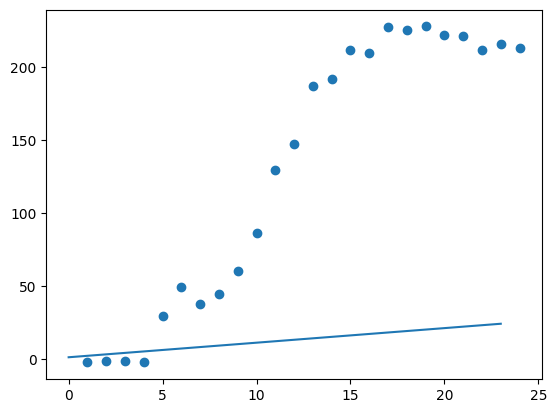

In [9]:
fitdata = odeint(func, ic, data["time"], args=(sol.x[0], sol.x[1], sol.x[2], sol.x[3], sol.x[4]))
plt.scatter(data["time"], data['Hp'], label = "Experimental Data")
plt.plot(data["time"], )